<a href="https://colab.research.google.com/github/fabriziorocco/Customer-Service-Car-Industry/blob/main/Case_Study_Group_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study 2 - Group 10**

#**Step 1: Forming the portfolio**

We started by importing the necessary libraries for the task, for which we provide a brief description here below:

*   **Numpy:** numerical computing tool

*   **Pandas** *(and related)*: data analysis and manipulation tool, direct data retrieval from web sources

*   **Seaborn:** statistical data visualization tool

*   **Statsmodel:** statistical models and statistical data exploration





In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import pandas_datareader.data as reader
import seaborn as sns
import statsmodels.api as sm
from matplotlib.pyplot import hist as plt

We picked **4** *Exchange-traded funds* (**ETFs**) from the website https://finance.yahoo.com

*   **ExxonMobil** (**XOM**): one of the world's largest international oil and gas companies


*   **Southwestern Energy** (**SWN**): among the largest producer of natural gas and natural gas liquids in the United States

*   **Verizon** (**VZ**): an American multinational telecommunications conglomerate

*   **General Motors** (**GM**): an American multinational corporation that designs, manufactures, markets, and distributes vehicles and vehicle parts

We proceeded by creating a list including the ticker symbols for the **4 ETFs** and the one of *SPDR S&P 500 ETF Trust* (**SPY**), which we later used as our market portfolio benchmark; we also defined the **list of weights** of our portfolio.

In [ ]:
tickers = ['XOM','SWN','VZ','GM','SPY']
weights = [0.2,0.3,0.3,0.2]

Through a built-in function from the *pandas_datareader* library, we imported the **daily adjusted price** (net of all dividends and payments) for the 5 stocks from the *Yahoo Finance* website, for the period ranging from *January 2015* to *March 2021*.

In order to properly compute the monthly return, it is necessary to consider  **the closing price on the day before the first day of each month**, i.e. the last day of the previous month. Therefore, the starting date is set to the *last working day of 2014*.



In [ ]:
price = web.get_data_yahoo(tickers,
                           start='2014-12-31',
                           end = '2021-03-31')
price = price['Adj Close']
price.head()

Symbols,XOM,SWN,VZ,GM,SPY
Date,,,,,
2014-12-31,69.394279,27.290001,34.963432,27.935520,182.247574
2015-01-02,69.679512,27.170000,35.097969,27.879498,182.149979
2015-01-05,67.772957,26.010000,34.806484,27.471392,178.860443
2015-01-06,67.412659,24.709999,35.157753,27.887501,177.175781
2015-01-07,68.095718,24.240000,34.930878,28.679714,179.383591


#**Step 2: Converting daily adjusted prices to monthly log returns**

In order to obtain *monthly log returns*, **2 methods** are available: 


*   **Percentage Change (PCT)**: a quick, reasonably precise approximation, for which a built-in function is provided

*   **Log-Based**: the accurate, step-by-step computation, whose results were used in the following analysis



## PCT Method 

The **Percentage Change method** is a mathematical procedure to describe *how a metric changes over time*. Here is a brief description of the functions used:

*   .resample('M') : daily adjusted prices are *grouped into monthly bins*, from the **last day of the previous month** ($P_{Last}$) to the **last day of the current one** ($P_{First}$) included

*   .ffill() : **missing data** is replaced with the first available value going **backward** in time

*   .pct_change() : for each bin, compute the Percentage Change according to the following formula:  **Pct_Change = $ \LARGE \frac{P_{Last} - P_{First}}{P_{First}}$**

Finally, we dropped *the first row* of the resulting dataset (concerning the last month of 2014), which was not needed for our analysis.

In [ ]:
price_pct = price.resample('M').ffill().pct_change()
price_pct = price_pct.dropna(axis=0) #dropping first row
price_pct

Symbols,XOM,SWN,VZ,GM,SPY
Date,,,,,
2015-01-31,-0.054408,-0.091609,-0.011313,-0.065597,-0.029629
2015-02-28,0.020435,0.011698,0.081820,0.143777,0.056205
2015-03-31,-0.039982,-0.075359,-0.016582,0.013344,-0.015706
2015-04-30,0.027883,0.208711,0.048929,-0.065067,0.009834
2015-05-31,-0.016772,-0.080628,-0.019826,0.025955,0.012856
...,...,...,...,...,...
2020-11-30,0.197117,0.164794,0.060011,0.269621,0.108777
2020-12-31,0.081038,-0.041801,-0.027479,-0.050182,0.037048
2021-01-31,0.087821,0.265101,-0.058109,0.217099,-0.010190


## Log-Based Method

According to the **Log-Based Method**, the *monthly log returns* are computed as:

$ \LARGE \ln (P_{Last}) - \ln (P_{First}) $

or equivalently

$ \LARGE \ln \frac{P_{Last}}{P_{First}} $

Since $\log (1+x) $ ~ $x$ according to the Taylor Series:

$ \LARGE \ln \frac{P_{Last}}{P_{First}} $ ~ $ \LARGE \frac{P_{Last} - P_{First}}{P_{First}}$

therefore the PCT method can be considered a **fairly good approximation** for the actual Log-Based method.

Nonetheless, we proceeded to compute the latter in order to achieve **better accuracy**.

The .last() function groups daily adjusted prices into monthly bins by taking the price of the *last working day* of the month. 


In [ ]:
new_price = price
price_last = new_price.resample('M').last()
price_last

Symbols,XOM,SWN,VZ,GM,SPY
Date,,,,,
2014-12-31,69.394279,27.290001,34.963432,27.935520,182.247574
2015-01-31,65.618683,24.790001,34.567886,26.103025,176.847672
2015-02-28,66.959633,25.080000,37.396240,29.856035,186.787354
2015-03-31,64.282440,23.190001,36.776119,30.254448,183.853714
2015-04-30,66.074799,28.030001,38.575535,28.285892,185.661713
...,...,...,...,...,...
2020-11-30,37.493282,3.110000,59.133942,43.840000,359.346283
2020-12-31,40.531681,2.980000,57.509003,41.639999,372.659454
2021-01-31,44.091232,3.770000,54.167236,50.680000,368.861908


In [ ]:
log_ret = pd.DataFrame()
log_ret['XOM'] = np.log(price_last.XOM) - np.log(price_last.XOM.shift(1))
log_ret['SWN'] = np.log(price_last.SWN) - np.log(price_last.SWN.shift(1))
log_ret['VZ'] = np.log(price_last.VZ) - np.log(price_last.VZ.shift(1))
log_ret['GM'] = np.log(price_last.GM) - np.log(price_last.GM.shift(1)) 
log_ret['SPY'] = np.log(price_last.SPY) - np.log(price_last.SPY.shift(1)) 
log_ret = log_ret.dropna(axis=0) #dropping first row
log_ret.head()

,XOM,SWN,VZ,GM,SPY
Date,,,,,
2015-01-31,-0.055944,-0.096080,-0.011378,-0.067848,-0.030077
2015-02-28,0.020229,0.011630,0.078645,0.134336,0.054682
2015-03-31,-0.040803,-0.078350,-0.016721,0.013256,-0.015830
2015-04-30,0.027501,0.189554,0.047770,-0.067280,0.009786
2015-05-31,-0.016914,-0.084064,-0.020025,0.025624,0.012774


#**Step 3: Constructing the porfolio**

After constructing our portofolio according to the previously chosen weights, we went ahead by calculating the **portfolio returns** for each month (as the *weighted sum* of the Log-Based monthly returns for each ETF)

In [ ]:
#Computing portfolio monthly returns
portfolio_df = log_ret[['XOM','SWN','VZ','GM']]
portfolio = (portfolio_df * weights).sum(axis = 1)

In [ ]:
#Creating a new dataframe containing both portfolio and SPY monthly returns
portfolio_dataframe = pd.DataFrame()
portfolio_dataframe['PORTFOLIO'] = portfolio
portfolio_dataframe['SPY'] = log_ret['SPY']

In [ ]:
portfolio_dataframe

,PORTFOLIO,SPY
Date,,
2015-01-31,-0.056996,-0.030077
2015-02-28,0.057996,0.054682
2015-03-31,-0.034031,-0.015830
2015-04-30,0.063241,0.009786
2015-05-31,-0.029485,0.012774
...,...,...
2020-11-30,0.146974,0.103258
2020-12-31,-0.015882,0.036379
2021-01-31,0.108715,-0.010243


#**Step 4: Using CAPM formula**

The main message of the **Capital Asset Pricing Model** (**CAPM**) is that the expected risk premium of a portfolio changes in *direct proportion* to β.

Specifically the **risk premium** is definied as:

$R - R_f$

where $R_f$ is the so called **Risk-free rate** which is the risk of an asset with β = 0.

The **CAPM formula** is as follows:

$R - R_f = β (R_m-R_f)$

We first **fetched** $R_f$ from the **Fama-French Data Library** at 
http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html 
and **subtracted** it from both the portfolio and the benchmark market return.

In [ ]:
rf = reader.DataReader('F-F_Research_Data_Factors','famafrench', '2014-12-31', '2021-03-31')[0].RF

In [ ]:
portfolio_dataframe = portfolio_dataframe[:-1]
portfolio_dataframe

,PORTFOLIO,SPY
Date,,
2015-01-31,-0.056996,-0.030077
2015-02-28,0.057996,0.054682
2015-03-31,-0.034031,-0.015830
2015-04-30,0.063241,0.009786
2015-05-31,-0.029485,0.012774
...,...,...
2020-10-31,0.049256,-0.025250
2020-11-30,0.146974,0.103258
2020-12-31,-0.015882,0.036379


In [ ]:
rf = rf[1:]

In [ ]:
portfolio_dataframe['PORTFOLIO-rf'], portfolio_dataframe['SPY-rf'] = portfolio_dataframe['PORTFOLIO'] - rf.values, portfolio_dataframe['SPY'] - rf.values 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
portfolio_dataframe

,PORTFOLIO,SPY,PORTFOLIO-rf,SPY-rf
Date,,,,
2015-01-31,-0.056996,-0.030077,-0.056996,-0.030077
2015-02-28,0.057996,0.054682,0.057996,0.054682
2015-03-31,-0.034031,-0.015830,-0.034031,-0.015830
2015-04-30,0.063241,0.009786,0.063241,0.009786
2015-05-31,-0.029485,0.012774,-0.029485,0.012774
...,...,...,...,...
2020-10-31,0.049256,-0.025250,0.039256,-0.035250
2020-11-30,0.146974,0.103258,0.136974,0.093258
2020-12-31,-0.015882,0.036379,-0.025882,0.026379


We procedeed by setting up and fitting an **Ordinary Least Squares (OLS)** model, taking **SPY-rf** as the independent variable and **PORTFOLIO-rf** as the dependent variable. 

The summary exhibits:

A ß of 1.0695, suggesting that the risk of our portfolio follows the movement of the market risk, **slightly magnifying** its effect. i.e. If the market risk premium goes up by 1%, then our porfolio risk premium will increase by 1.0695% 

We can conclude that the model is **statistically significant**, since the *P-Value* of the estimated coefficient is *very low* (*P-Value* < $10^{-3}$). 
Moreover, the *R-squared* of 0.663 suggests that a **substantial portion of variability** has been explained by this model (the percentage is rather good considering that we have only 1 predictor). 

In [ ]:
X_rf = portfolio_dataframe['SPY-rf']
y_rf = portfolio_dataframe['PORTFOLIO-rf']
x_rf = sm.add_constant(X_rf) #An intercept is not included by default and should be added by the user 
model_rf = sm.OLS(y_rf,x_rf)
results_rf = model_rf.fit()
results_rf.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PORTFOLIO-rf   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     141.9
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           1.08e-18
Time:                        21:19:25   Log-Likelihood:                 95.618
No. Observations:                  74   AIC:                            -187.2
Df Residuals:                      72   BIC:                            -182.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0105      0.010     -1.086      0.281      -0.030       0.009
SPY-rf         1.0695      0.090     11.912      0.000       0.891       1.249
==============================================================================
Omnibus:                        1.626   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.444   Jarque-Bera (JB):                1.577
Skew:                           0.342   Prob(JB):                        0.455
Kurtosis:                       2.788   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results_rf.params

const    -0.010475
SPY-rf    1.069541
dtype: float64

Finally, we plotted the results of the linear regression.

In light blue we can see the **95% confidence intervals** for the two estimated coefficients (α and β) 

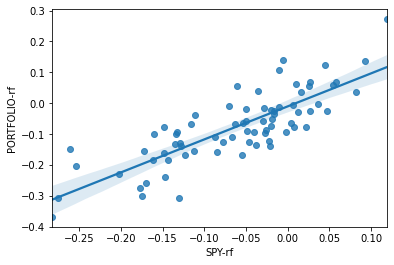

In [ ]:
sns.regplot(x='SPY-rf', y='PORTFOLIO-rf', data=portfolio_dataframe)

# **Step 5: Changing the weights**

We lastly **experimented** with the vector of weights, trying out different combinations; we present one setting that entails a **significant change** in the ß coefficient

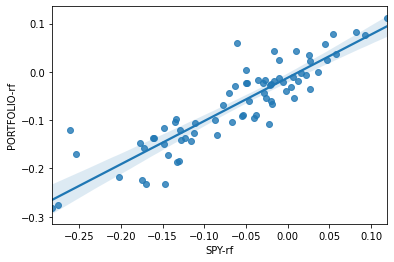

In [ ]:
new_weights = [0.05,0.05,0.8,0.1]

#Computing portfolio monthly returns
portfolio_df_new = log_ret[['XOM','SWN','VZ','GM']]
portfolio_new = (portfolio_df_new * new_weights).sum(axis = 1)

portfolio_dataframe_new = pd.DataFrame()
portfolio_dataframe_new['PORTFOLIO'] = portfolio_new
portfolio_dataframe_new['SPY'] = log_ret['SPY']

portfolio_dataframe_new = portfolio_dataframe_new[:-1]
portfolio_dataframe_new['PORTFOLIO-rf'], portfolio_dataframe_new['SPY-rf'] = portfolio_dataframe_new['PORTFOLIO'] - rf.values, portfolio_dataframe_new['SPY'] - rf.values 

X_rf_new = portfolio_dataframe_new['SPY-rf']
y_rf_new = portfolio_dataframe_new['PORTFOLIO-rf']
x_rf_new = sm.add_constant(X_rf_new) 

model_rf_new = sm.OLS(y_rf_new,x_rf_new)
results_rf_new = model_rf_new.fit()

sns.regplot(x='SPY-rf', y='PORTFOLIO-rf', data=portfolio_dataframe_new)

In [ ]:
results_rf_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           PORTFOLIO-rf   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     286.0
Date:                Tue, 13 Apr 2021   Prob (F-statistic):           8.81e-27
Time:                        21:19:26   Log-Likelihood:                 134.72
No. Observations:                  74   AIC:                            -265.4
Df Residuals:                      72   BIC:                            -260.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0123      0.006     -2.157      0.034      -0.024      -0.001
SPY-rf         0.8951      0.053     16.910      0.000       0.790       1.001
==============================================================================
Omnibus:                        9.816   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.007   Jarque-Bera (JB):               11.080
Skew:                           0.638   Prob(JB):                      0.00393
Kurtosis:                       4.401   Cond. No.                         11.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results_rf_new.params

const    -0.012262
SPY-rf    0.895122
dtype: float64

Indeed, the estimated ß turns out to be **smaller**; in particular, ß = 0.8951 *(0 < ß < 1)*, which indicates that the portfolio is **less volatile** than the market (its return moves less than 1-to-1 with the return of the benchmark-portfolio). It can be noticed that the weights we picked are **fairly unbalanced**, as we would invest 80% of our money on one single stock (**Verizon**); however, results suggest that this is a rather **safer strategy** with respect to the previous one, where we distributed the portions of investment **almost evenly** across all the stocks.